In [54]:
import pandas as pd
import numpy as np

In [117]:
# Load real dataset
real_df = pd.read_csv('Preprocessed_Dataset.csv')

# Create synthetic dataset
synthetic_df = real_df.copy()
np.random.seed(42)

In [118]:
for col in real_df.columns:
    if real_df[col].dtype in ['float64', 'int64']:
        std = real_df[col].std()
        
        # Lower noise (8% of std)
        noise = np.random.normal(0, std * 0.001, size=len(real_df))
        
        # Lower scaling range ±3%
        scale_factor = np.random.uniform(1.00, 1.002)
        
        synthetic_df[col] = (real_df[col] * scale_factor) + noise
        
        # Handle integer columns
        if real_df[col].dtype == 'int64':
            synthetic_df[col] = synthetic_df[col].round().astype(int)
            synthetic_df[col] = synthetic_df[col].clip(lower=0)
    else:
        # For categorical columns: random shuffle
        synthetic_df[col] = np.random.choice(real_df[col].values, size=len(real_df), replace=True)


In [119]:
# Save synthetic dataset
synthetic_file = 'TTS-2.csv'
synthetic_df.to_csv(synthetic_file, index=False)
print(f"Synthetic dataset saved as: {synthetic_file}")


Synthetic dataset saved as: TTS-2.csv


In [72]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [73]:
# Load real and fake datasets
real_df = pd.read_csv('Preprocessed_Dataset.csv')
fake_df = pd.read_csv('TTS-2.csv')  

In [74]:
# Add labels
real_df['Source'] = 'Real'
fake_df['Source'] = 'Synthetic'

In [75]:
# Combine datasets
combined_df = pd.concat([real_df, fake_df], ignore_index=True)

In [76]:
# Separate features and label
X = combined_df.drop(columns=['Source'])  # If target column exists, you can also drop it
labels = combined_df['Source']

In [77]:
# Optional: Sample for speed
np.random.seed(42)
sample_indices = np.random.choice(range(X.shape[0]), size=5000, replace=False)
X_subset = X.iloc[sample_indices]
labels_subset = labels.iloc[sample_indices]

In [78]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

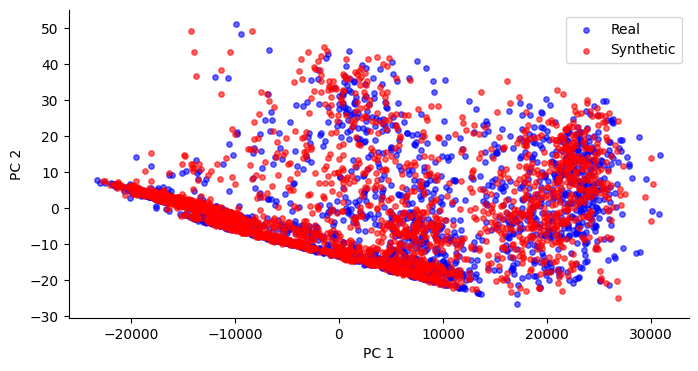

In [79]:
# PCA Plot
plt.figure(figsize=(8, 4))
for source, color in zip(['Real', 'Synthetic'], ['blue', 'red']):
    mask = (labels_subset == source)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                label=source, alpha=0.6, s=15, c=color)
#plt.title('PCA: Real vs Synthetic Data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

# Remove only top and right box lines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [68]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_subset)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



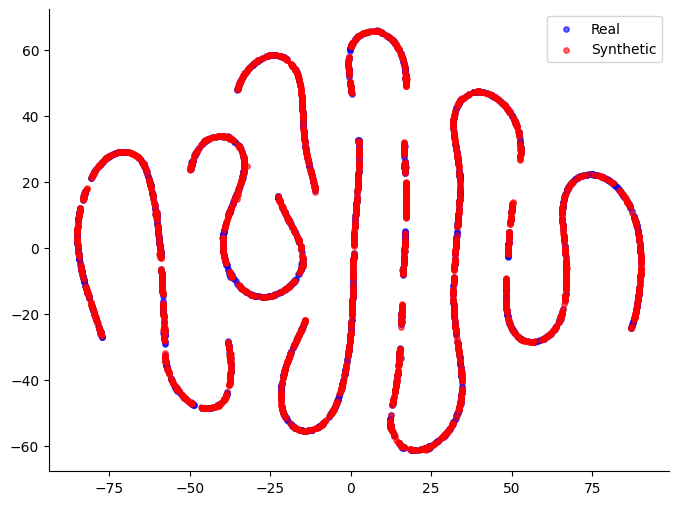

In [10]:
# t-SNE Plot
plt.figure(figsize=(8, 6))
for source, color in zip(['Real', 'Synthetic'], ['blue', 'red']):
    mask = (labels_subset == source)
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                label=source, alpha=0.6, s=15, c=color)

#plt.title('t-SNE: Real vs Synthetic Data')
plt.legend()

# Remove only top and right box lines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [16]:
# t-SNE in 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
X_tsne_3d = tsne.fit_transform(X_subset)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



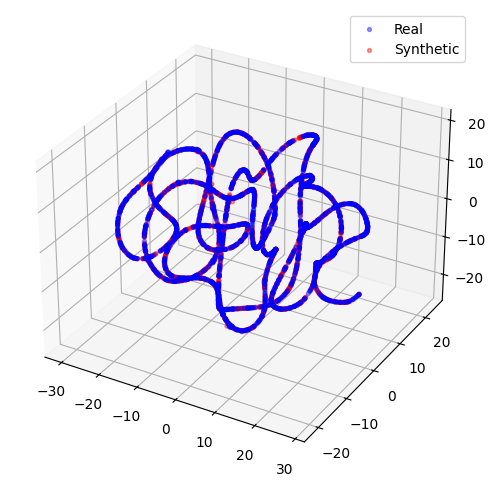

In [25]:
# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Corrected colors
colors = {'Real': 'blue', 'Synthetic': 'red'}

for label in ['Real', 'Synthetic']:
    mask = (labels_subset == label)
    ax.scatter(
        X_tsne_3d[mask, 0], X_tsne_3d[mask, 1], X_tsne_3d[mask, 2],
        s=8,          # smaller marker
        alpha=0.4,    # more transparency
        c=colors[label],
        label=label
    )

# Labels (optional, uncomment if needed)
# ax.set_title('3D t-SNE: Real vs Synthetic Data', fontsize=14)
# ax.set_xlabel('t-SNE Component 1')
# ax.set_ylabel('t-SNE Component 2')
# ax.set_zlabel('t-SNE Component 3')

ax.legend()
plt.show()


In [27]:
# PCA 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_subset)

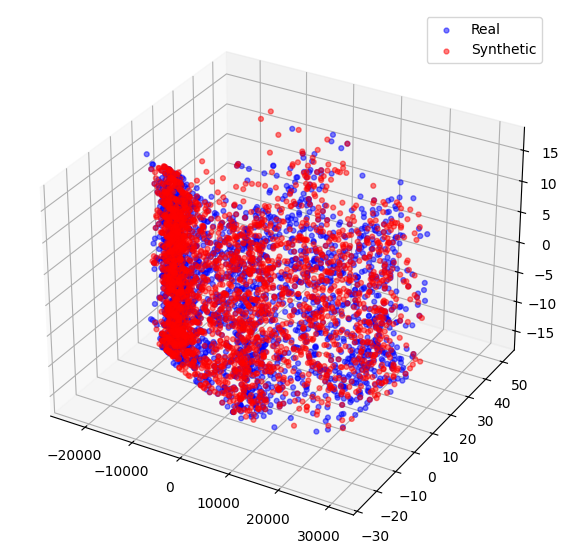

In [35]:
# 3D PCA Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for source, color in zip(['Real', 'Synthetic'], ['blue', 'red']):
    mask = (labels_subset == source)
    ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
               label=source, alpha=0.5, s=12, c=color)

#ax.set_xlabel('PC 1')
#ax.set_ylabel('PC 2')
#ax.set_zlabel('PC 3')
ax.legend()
plt.show()